In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Loss functions

## Mean Squared Error (MSE) - L2/Quadratic Loss

> commonly used in regression tasks (ie. linear graphs)

We calculate the mean (average) of the squared difference between each prediction and the desired ouput. Wrong predictions are punished more because the error is squared (so if the difference is big - it squared is even bigger)

$$MSE(T_i, p_i) = \frac{1}{n} \sum_{i=1}^{n} (T_i - p_i)^2$$

So a loss for each example/pair of label - prediction is :

$$MSE(truth, prediction) = (truth - prediction)^2$$

In [29]:
def MSE(truth, prediction):
    return np.mean(truth - prediction)**2

In [42]:
#Example usage:

In [41]:
predictions = np.linspace(-100, 100, 100) 

#all ones - truth is always 1
truth_labels = np.ones_like(predictions)

loss_for_each_prediction = []

for truth,prediction in zip(truth_labels, predictions):
    loss_for_each_prediction.append(MSE(truth, prediction)) 

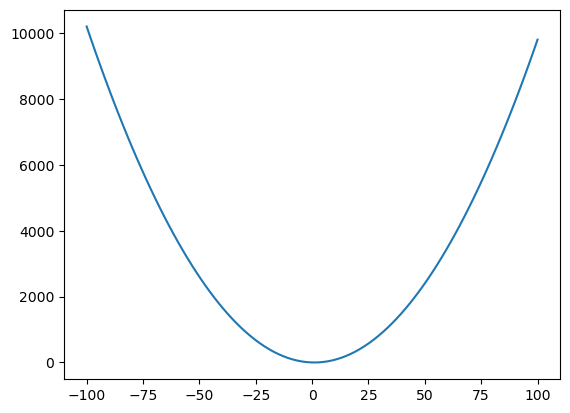

In [40]:
plt.plot(predictions, loss_for_each_prediction)
plt.draw()

## Mean Absolute Error - L1

## Cross-Entropy  
> commonly used in classification tasks

This is used when we are "guessing" if something belongs in a certain class or not. 

So the question is "how sure are you that the instance belong in (x) class ?" - and generally the asnwers are between 0 and 1 (like procenteges are between 0% and 100%). So if im very sure i'd say 99% - which as a prediction would map to 0.99 

>(this is what activation functions do - take in some input and output it in a useful way).

| |   |
|---|---|
| $C$ | often used as number of classes |
| |   |

Logarithm (log) is a function sensitive to differences. What that means is that it will react greatly weather a prediction is 0.1 or 0.9. 

$log(0.1)≈$ (big loss)

$log⁡(0.9)≈ $ (small loss)

Since in cross-entropy the final loss is the sum of all losses (divided by the number of samples) we want those losses to be as small as possible - meaning whatever is sent to the log function should be a high value.

> When the number of classes is more than two(binary classification) it is a multi-class classification.


### Binary Cross-Entropy (BCE) - Log loss
> commonly used in binary classification tasks (1 or 0 ?)

$C' = 2$, where : $C_1 = 1$ and $C_2 = 0$ 

| |   |
|---|---|
| positive class | arbitrary.. (usually just 1), the "more significant" class ; this is what the model is referencing    |
| negative class | the other class (usually 0)  |
| |   |

Here when asking the question "how sure are you that the instance belong in (x) class ?" the x class is the positive class, if we don't we run into a small problem.

> "how sure are you that the instance belongs in **class 1** ?"
<br> - very! 99% 
<br>"how sure are you that this new instance belongs in **class 0** ?" 
<br> - highly ! 89% !

What is the problem here ?

So for the sake of easier understanding let's say we are predicting weather there is a cat(1) or a dog(0) on an image.

We give a model a picture and it returns 0.9. What does that tell us ? Nothing because this picture doesn't have a label yet (this is what the model is for). We don't know what is on the picture so how could we ask a question in the format of "how sure are you that the instance belongs in (x) class ?".

"So just pick a class and let the model reference it when asnwering!" Bingo.

This is where we bring in the term positive class. The referenced class.

Let's say we pick cat as the positive class. This means the models predictions will answer the question "how sure are you that this new instance is a cat ?"

The model would return something like 0.9 if it thinks there is a cat. But if it thinks there is a dog(so it is like 5% sure there is a cat there) the returned value would be 0.05 (lower value because it doesn't think the sample belongs into the positive class)

>but if we flip it so dog(0) is the positive class then the model will predict 0.7 if it thinks it there a dog and 0.1 if it thinks there is a cat (because the positive class is dog)

**The problem we run into with binary classification is that anything that isn't a cat is a dog. Or in more real terms everything that isn't a positive class is the negative class - even if it is neither.** 
> This is where we turn this problem into a multi-class one, adding a third option/class.

First let's see what BCE does. This is the equation when **the positive class is 1**. 
> (we run into some small problems if the positive class is 0 ; ie. we are punishing the correct answers)

$$BCE(T_i, s_i)  =  - \frac{1}{n} \sum_{i=1}^{n}(T_i * log(p_i) + (1 - T_i) * log(1 - p_i))$$

Loss for one example/sample is :

$$BCE(truth, prediction) = (loss\ for\ C_1\ + loss\ for\ C_2)$$

$loss\ for\ C_1 = T_i * log(s_i)$

$loss\ for\ C_2 = (1 - T_i) * log(1 - s_i)$

$T_i$ : truth ; binary value (either 1 or a 0)
> respresents the "class" of the example

$s_i$ : propability ; between 0 and 1 (closer it is to 1 the more the model thinks the sample belongs into the positive class)
> how confident is the model that the example belongs in the positive class

<br>

- when $T_i$ = 0 ; only loss for $C_2$ ; loss for $C_1$ falls off because we multiply it by 0

> $(1 - T_i)$ to $(1 - 0) = 1$, this changes nothing when truth is 0

$$1 * log(1 - s_i)$$ 

<br>

- when $y_i$ = 1 ; only loss for $C_1$ ; loss for $ C_2 $ falls of because we multiply it by 0, 
<br> $(1 - T_i) $ to $ (1 - 1) = 0$

> $y_i * something$ to $1 * something$ ; changes nothing 

$$1 * log(s_i)$$

We are left with logarthims of our models predictions.

Ideally the value sent to the log function should be high in both cases.
If the truth is 1 then the model should output a high value ($\hat{y}_i$ = 0.9+), but if the truth is 0 then the model should output a low value ($\hat{y}_i$ = 0.1-). But because the positive class is 1 what we send to log when truth is not the positive class(0) is $(1-0.1) = 0.9$ (a high value) - making the loss really small because the prediction is correct even if the models output isn't high.


In [4]:
def BCE(truth, prediction):
        return -np.mean(truth * np.log(prediction) + (1 - truth) * np.log(1 - prediction))

In [5]:
# Example usage:
training_dataset = np.array([0, 1, 1, 0, 1])

bad_predictions = np.array([0.9, 0.3, 0.5, 0.1, 0.1])
good_predictitons = np.array([0.1, 0.9, 0.8, 0.1, 0.9])

In [9]:
print("Loss with BAD predictions:", BCE(training_dataset, bad_predictions))
print("Loss with GOOD predictions:", BCE(training_dataset, good_predictitons))

Loss with BAD predictions: 1.3215301373063597
Loss with GOOD predictions: 0.12891712278910297


- graph when truth is always 1 ; $ T $ = 1

In [24]:
#values from 0.1 to 0.99.. (all possible predictions)
predictions = np.linspace(0.01, 0.99, 100) 

#all ones - truth is always 1
truth_labels = np.ones_like(predictions)

loss_for_each_prediction = []

for truth,prediction in zip(truth_labels, predictions):
    loss_for_each_prediction.append(BCE(truth, prediction)) 

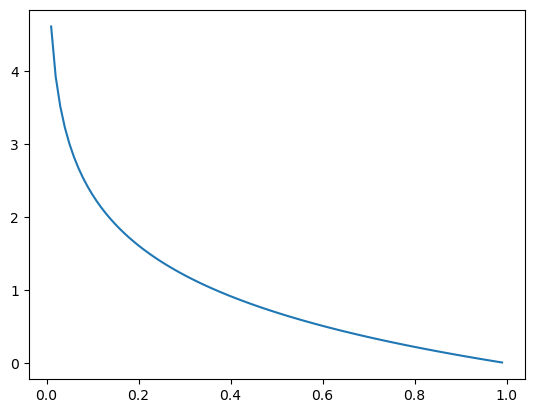

In [25]:
plt.plot(predictions, loss_for_each_prediction)
plt.draw()

### Categorical Cross-Entropy (CCE) - Softmax Loss

> commonly used in multi-class classification tasks (1 or 2 or 3 .. ?)

When we have more than two classes or categories that our samples can have we use Categorical CE.

Here each example can belong to one class. The model predictions are withing vector(a 1D array), where each index presents a class and the value on that index the propability of the example belonging to that class.

> So let's expand on the binary dog/cat prediction model and make it multi-class by also being able to predict if there is a bird on an image. 
<br> Each category is associated with an index in a vector : dog = 0, cat = 1, bird = 2 so the array for EACH sample looks something like: [0.2, 0.1, 0.9]. (when testing the truths are also provided with a vector of the same size as the number of classes - so [0,0,1])
<br> The **max** value inside an array is the prediced class - in this case 0.9 at the index 2 - bird.


>This  calculates the cross-entropy for each element of a given array (each pair of [truth, prediction] - predictions where truth is 0 - as in not a relevant class are also 0 result in the sum of only the losses of the relevant guesses)


$$ \text{CCE}(T, p) = - \sum_{i=1}^{C} T_i \cdot \log(p_i) $$



In [70]:
def CCE(truth_labels, predictions):
    return -np.sum(truth_labels * np.log(predictions+1e-15))

## True Cross-Entropy

When there is more than one instance in a batch(ie. multiple pairs of truth vector - prediction vector we sum up the loss for each) - we also divide it by the numbr of samples.

$$ \text{CCE}(T, p) = -\frac{1}{N} \sum_{n=1}^{N} \sum_{i=1}^{C} T_i \cdot \log_2(p_i) $$

$ N $ = number of samples (ie. pairs of truth vector and prediction vector)

$ C $ = number of classes - size of a vector (how many elements in each ?)

In [67]:
#here truth lables is a 2 dimensional vector - and so are the predictions
def tCCE(truth_labels, predictions):
    return -(1/len(truth_labels))*np.sum(truth_labels * np.log(predictions+1e-15))

In [71]:
# Example usage ; 3 classes

bad_sample = { 'truth': [1,0,0], 'prediction':[0.1, 0.76,0.8] } # bad
good_sample = {'truth': [0, 1, 0], 'prediction': [0.1, 0.9, 0]} # good


# just the cce loss for each prediction
loss_bad_preds = CCE(
    truth_labels=np.array(bad_sample['truth']), 
    predictions= np.array(bad_sample['prediction'])) 

print("Loss with BAD predictions:", loss_bad_preds)

loss_good_preds = CCE(
    truth_labels=np.array(good_sample['truth']), 
    predictions=np.array(good_sample['prediction']))
    
print("Loss with GOOOD predictions:", loss_good_preds) 

Loss with BAD predictions: 2.3025850929940357
Loss with GOOOD predictions: 0.10536051565782517


In [64]:
#both(all) truth arrays
truth_labels = 

print("Loss for the model: ", tCCE())

Loss for the model:  0.8026485362172869
